<a href="https://colab.research.google.com/github/fernandotoscano/BIOINFORMATICS/blob/main/C%C3%B3pia_de_CDD_ML_Part_5_Acetylcholinesterase_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



# ***PART_5: MODEL COMPARISON***

**IN THIS CHAPTER WILL GONNA SHOW HOW TO COMPARE SEVERAL MACHINE LEARNING ALGORITHMS FOR BUILDING REGRESSION MODELS FOR ACETYLCHOLINESTERASE INHIBITORS AND TODAY, WE'RE GOING TO BE USING A LAZY (RÁPIDA/SIMPLES/EFICAZ) AND EFFICIENT WAY OF BUILDING SEVERAL MACHINE LEARNING ALGORITHMS AND THIS WAS SHOWN IN A RECENT VIDEO USING THE LAZY PREDICT PYTHON LIBRARY AND SO WE'RE GOING TO BE USING THAT FOR TODAY'S TUTORIAL AND BEFORE PROCEEDING MFURTHER   LET'S DO A QUICK RECAP:

_SO IN **PART_1** WE'VE SHOWN HOW WE CAN COLLECT ORIGINAL DATA SET IN BIOLOGY THAT WE COULD USE IN OUR OWN DATA SCIENCE PROJECT PARTICULALRLY WE HAVE DEMONSTRATED TO HOW WE COULD DOWNLOAD AND PRE-PROCESS THE BIOLOGICAL ACTIVITY DATA FROM THE CHEMBL DATABASE AND THE DATA SET IS COMPRISED OF [1:11:47] OF COMPOUNDS AND MOLECULES THAT HAVE BEEN BIOLOGICALLY TESTED FOR THEIR ACTIVITY TOWARD THE TARGET ORGANISM OR PROTEIN OF INTEREST.
_THEN IN **PART_2** WE HAVE SHOWN HOW WE COULD CALCULATE THE LIPINSKI DESCRIPTORS, WHICH ARE DESCRIPTORS USED FOR EVALUATING THE LIKELIHOOD  OF BEING A DRUG-LIKE MOLECULE AND THEN WE'VE SHOWN HOW WE COULD PERFORM SIME BASIC EXPLORATORY DATA ANALYSIS ON "THESE(SEE IN PART_2)" LIPINSKI DESCRIPTORS PARTICULARLY THE EDA ARE BASED ON MAKING SIMPLE BOX PLOT AND SCATTER PLOT IN ORDER TO VISUALIZE THE DIFFERENCES OF THE ACTIVE AND INACTIVE SUBSET OF THE COMPOUND.
_IN **PART_3** WE HAVE MADE SOME CHANGES TO TARGET PROTEIN AND THEN WE'RE USING THE ACETYLCHOLINESTERASE AS IT PROVIDES A LARGER SET TO WORK WITH. AND SO IN THIS PART_3 WE HAVE ALREADY COMPUTED THE MOLECULAR DESCRIPTORS USING THE "PADEL" DESCRIPTOR SOFTWARE AND THEN WE PREPARED THE DATA SET COMPRISING OFTHE "X" AND "Y" DATA FRAMES AND THEN WE USED THAT TO BUILD A PREDICTION MODEL IN THE SUBSEQUENT PARTS WHICH IS PART_4.
_IN **PART_4** WE USED THE DESCRIPTORS GENERATED FROM PART_3 IN ORDER TO BUILD A REGRESSION MODEL USONG THE RANDOM FOREST ALGORITHM.

_AND NOW TO **PART_5** LET'S GET STARTED:
SO HERE WE'RE GOING TO COMPARE SEVERAL MACHINE LEARNING ALGORITHM USING THE "lazypredict" LIBRARY.
AND SO THE 1ST THING THAT WE NEED TO DO IS AFTER DOWNLOADED THE FILE FROM DATA PROFESSOR/CODE/PYTHON "CDD_ML_Part_5_Acetylcholinesterase_Compare_Regressors.ipynb" TO OUR COMPUTER, AND START THE NOTEBOOK, IS INSTALL THE LAZT PREDICT AND SO IN A PRIOR WE'VE SHOWN HOW WE COULD USE THE "LAZYPREDICT" TO DO A QUICK AND RAPID MODEL BUILDING OF CLASSIFICATION AND ALSO A REGRESSION MODEL IN JUST A FEW LINES OF CODE. AND SO LET'S START BY INSTALLING THE LIBRARY:**

## **1. Import libraries**

In [ ]:
! pip install lazypredict

**THE NEXT INSTALLATION "! pip install dask[dataframe]", WAS SUGESTED BY THE SOFTEWARE OF COLAB**

In [ ]:
! pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 3.7 MB/s eta 0:00:00


**AND NOW WE'RE GOING TO BE IMPORTING THE NECESSARY LABRARIES AND SO HERE WE'RE USING THE PANDAS, SEABORN AND ALSO THE SCIKIT LEARN LIBRARY, SPECIFICALLY WE'RE IMPORTING THE TRAIN TEST SPLIT FUNCTION AND THEN WE'RE GOING TO BE IMPORTING THE LAZYPREDICT AND ALSO THE LAZY REGRESSOR FUNCTION:**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


**NOW WE'RE GOING TO BE LOADING UP THE DATA SET AND WE'RE GOING TO BE DIRECT DOWNLOADING IT FROM THE GITHUB "github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv", **

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-02-05 13:18:04--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-02-05 13:18:05--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

**NOW WE'RE GOING TO DOWNLOAD IT AND NOW WE'RE GOING TO BE READING IN THE FILE AND THEN WE'RE GOING TO ASSIGNING IT TO THE "df" DATA FRAME:**

In [ ]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

**NOW WE'RE GOING TO SPLITTING IT UP INTO THE "X" AND "Y" VARIABLES:**

In [ ]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

**NOW LET'S TAKE A LOOK AT THE DIMENSION OF THE "X" VARIABLE **

In [ ]:
# Examine X dimension
X.shape

(4695, 881)

**ANALYSING THE ABOVE DIMENSION, WE CAN SEE THAT IT HAS A TOTAL OF 4695 ROWS OR THE NUMBER OF COMPOUNDS IN THE DATA SET AND IT HAS A TOTAL OF 881 DESCRIPTORS OR THE FEATURES OR THE NUMBER OF COLUMNS. AND SO THE 1ST THING THAT WE NEED TO DO, IS WE'RE GOING TO BE REMOVING THE LOW VARIANCE FEATURES,
SO THOSE THAT HAVE LOW VARIANCE.**

In [ ]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

**AND LET'S TAKE A LOOK AT THE DIMENSION OF THE DATA SET AGAIN. AND SO WE HAVE A REDUCED SUBSET FROM 881 TO BE 137 VARIABLES.
NOW WE'RE GOING TO BE PERFORMING A DATA SPLIT USING THE 80:20 RATIO.**

In [ ]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

**NOW, COMES THE FUN PART SO AS WE CAN SEE HERE WE'RE GOING TO BE BUILDING MORE THEN 20 MACHINE LEARNING MODELS [1:15:25].
AND SO WE'RE USING ONLY 3 LINES OF CODE THE 1ST ONE IS LIKE ANY OTHER SCIKIT-LEARN FUNCTIONS FOR BUILDING THE MODEL, IS TO ASSIGN THEMACHINE LEARNING ALGORITHM INTO A CLASSIFIER VARIABLE AND THEN WE'RE GOING TO BE ASSIGNING THE RESULTS FROM THE PREDICTION AFTER WE BUILT THE MOLDEL AND THEN WE'RE ASSIGNING IT TO THE TRAIN AND TEST VARIABLES. SO THE TRAIN AND TEST VARIABLES WILL BE CONTAINING THE PERFORMANCE IF THE MODEL'S PREDICTION. AND SO LET'S BUILD THE MODEL, RUNNING THE CODE BELLOW:**

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [01:22<00:01,  1.47s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [01:22<00:00,  1.97s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [00:51<00:00,  1.45it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


100%|██████████| 42/42 [00:51<00:00,  1.23s/it]


**SO ABOVE WE'VE 42 MODELS, 42 MACHINE LEARNING ALGORITHMS, THIS TAKES SOME TIME BECAUSE THE DATA IS RELATIVELY BIG AT ALMOST 5000 ROWS.
AND SO, IT SHOULD BE NOTED HERE THAT MODEL BUILDING IS USING DEFAULT PARAMETERS FOR ALL OF THE 42 ALGORITHMS USED.
AND SO IF WE WANT TO PERFORM HYPER PARAMETER OPTIMIZATION THAT WILL BE A TOPIC FOR ANOTHER VIDEO (NOTE THAT THIS LINES OF CODE ABOVE ARE NOT EQUAL TO THE_ VIDEO LINES OF CODE, IT HAS BEEN IMPROVED SINCE THE VIDEO WAS RECORDED).

_AND SO MODELS HAVE BEEN BUILT AND LET'S HAVE A LOOK AT THE TRAIN:**

In [ ]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.86,0.86,0.57,0.38
ExtraTreeRegressor,0.86,0.86,0.57,0.44
ExtraTreesRegressor,0.86,0.86,0.57,10.45
GaussianProcessRegressor,0.86,0.86,0.57,8.47
RandomForestRegressor,0.82,0.83,0.64,5.08
BaggingRegressor,0.80,0.81,0.67,3.11
MLPRegressor,0.76,0.77,0.75,6.20
HistGradientBoostingRegressor,0.67,0.69,0.87,1.21
LGBMRegressor,0.65,0.67,0.90,0.52


**SO "DecisionTreeRegressor" IS THE BEST MODEL HERE, SO FROM OUR PRIOR TUTORIALS, "RandomForestRegressor" (MUST BE CONFIRMED) WAS USED FOR THE MODEL BUILDING, AND SO HERE IT HAD "SLIGHTLY BETTER PERFORMANCE" (NOT CORRECT???).

_NOW LET'S LOOK AT THE TEST SET:**

In [ ]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,1.12
RandomForestRegressor,0.44,0.52,1.08,4.99
LGBMRegressor,0.44,0.52,1.08,0.35
BaggingRegressor,0.41,0.49,1.11,0.55
NuSVR,0.39,0.48,1.12,1.59
SVR,0.39,0.48,1.12,1.87
KNeighborsRegressor,0.37,0.46,1.14,0.12
MLPRegressor,0.36,0.45,1.15,7.11
GradientBoostingRegressor,0.33,0.42,1.18,1.69


**IN TEST SET "HistGradientBoostingRegressor" IS THE 1ST MODEL, "RandomForestRegressor" ALSO AT 2ND PLACE HERE, BUT THE THING IS THEY'RE ROUGHLY THE SAME "0.54" AND "0.52" **

## **5. Data visualization of model performance**

**LET'S HAVE A LOOK AT THE DATA VISUALIZATION [1:17:26] OF THE MODEL PERFORMANCE.
SO THE BARA PLOT OF THE "R-SQUARED" VALUES IS PROVIDED HERE:**

[(0.0, 1.0)]

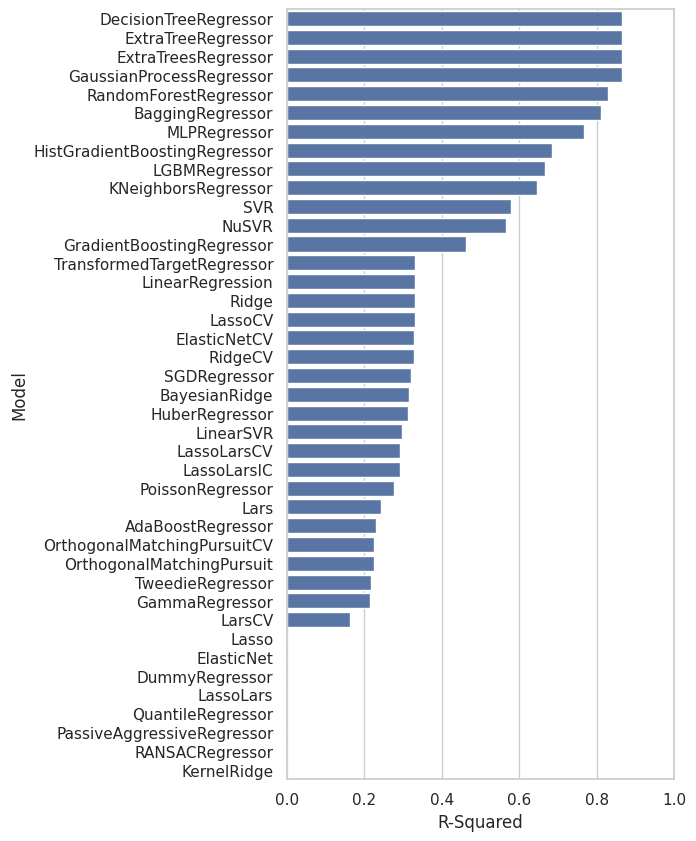

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

**AND NOW WE'RE GOING TO HAVE A LOOK AT THE "RMSE" VALUES HERE,**

[(0.0, 10.0)]

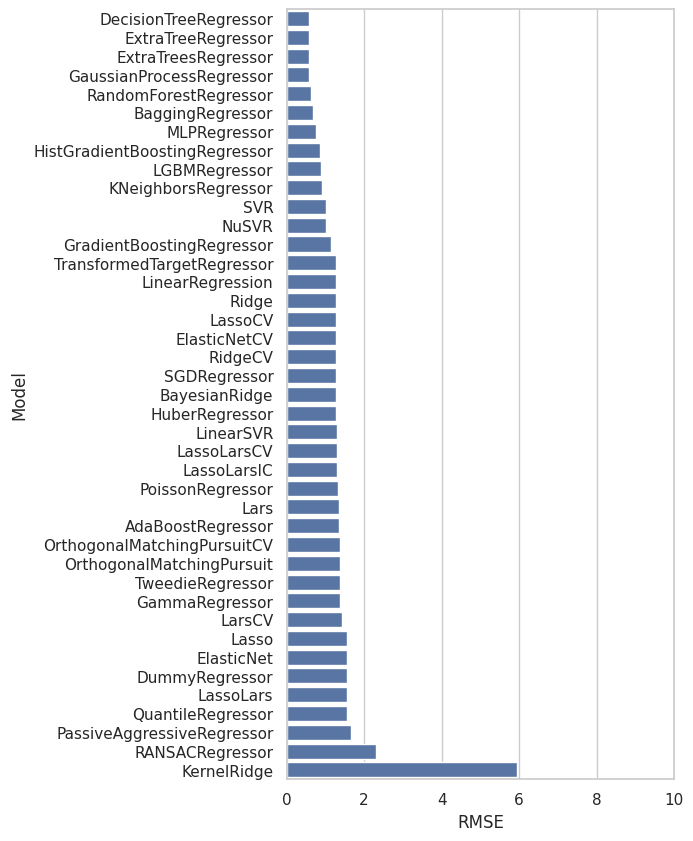

In [ ]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

**AND HERE WE'RE ALSO GOING TO HAVE A LOOK AT THE "CALCULATION TIME",  **

****

[(0.0, 10.0)]

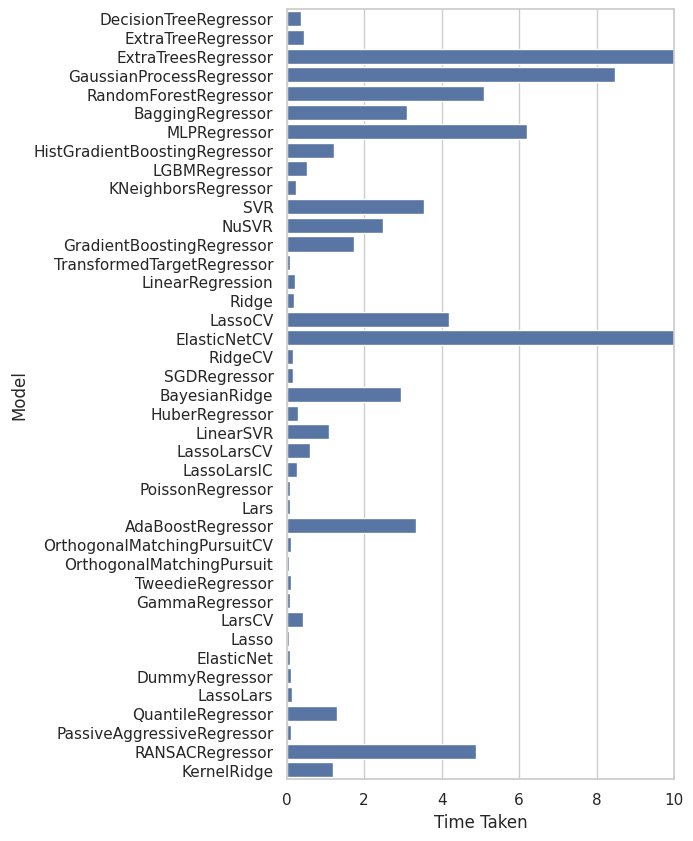

In [ ]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

**SO THE LONGER THE BARS BECOME THE LONGER IT TAKES TO BUILD THE MODEL.**

**WITH THIS WE'VE ALREADY BUILT SEVERAL MACHINE LEARNING MODELS FOR COMPARISON**

# **END OF PART_5**

**IN PRIOR CHAPTERS OF BIOINFORMATICS FROM SCRATCH SERIES WE HAVE LEARNED HOW:
_TO COMPILE OUR VERY OWN BIOACTIVITY DATA SET DIRECTLY FROM THE "CHEMBL" DATABASE,
_HOW TO PERFORM EDA (EXPLORATORY DATA ANALYSIS)ON THE COMPUTED LIPINSKI DESCRIPTORS,
_WE'VE LEARNED HOW TO BUILD RANDOM FOREST MODEL,
_WE'VE LEARNED ALSO LEARNED HOW TO BUILD SEVERAL MACHINE LEARNING MODELS, COMPARING THE MODEL PERFORMANCE, USING THE LAZYP REDICT LIBRARY.**

In [ ]:
te

# **PART_6-MODEL DEPLOYMENT**
**SO IN THE NEXT CHAPTER, **PART_6**, WE'LL BE TAKING A LOOK ATHOW WE CAN TAKE MACHINE LEARNING OF THE BIOACTIVITY DATA SET AND CONVERT IT INTO A WEB APPLICATION THAT WE COULD DEPLOY ON THE CLOUD THAT  WILL ALLOW USERS TO BE ABLE TO MAKE PREDICTIONS ON OUR MACHINE LEARNING MODEL, FOR THE TARGET PROTEIN OF OUR INTEREST.




# AND SO WITHOUT FURTHER DO, WED'LL START RIGHT NOW:

WHAT WE REALLY DID WAS:

IN ANACONDA ENVIRONMENT WE'VE CREATED "bioactivity_new", THEN WE'VE CREATED A FOLDER CALLED "bioactivity_demo" WERE WE DOWNLOADED AND UNZIPPED DE FILE EXTRACTED FROM "(https://github.com/dataprofessor/bioactivity-prediction-app)", THEN WE OPPENED VSCODE INSIDE THE ENVIRONMENT THAT WE HAD CREATED. THEN WE RUNNED THE FILE "bioactivity_prediction_app.ipynb", TO GET ACTUALIZED "acetylcholinesterase_model.pkl" AND "descriptor_list.csv" FILES , TO UPDATE THE FILES THAT WE WANT TO USE IN THIS APP. OF CORSE WE DID SOME MODIFICATIONS TO COULD RUN THIS PART OF THE DATAPROFESSOR CHAPTER IN THE REFERED FILE. THE VIDEO USED HAS REFENCE, HAD 4 YEARS AT THE TIME THAT WE DID THIS EXERCISE. WE ENCOUNTER SEVEREAL PROBLEMS AND TO RUN THE APP HAS DATAPROFESSOR DID WE HAD TO MADE SOME MODIFICATIONS HAS WE MENTIONED ABOVE, ONE WAS TO INSERT THE STREAMLIT AT THE BEGINNING OF THE CODE, AND OTHERS. AT THE END WE RUN IN THE TERMINAL "streamlit run app.py". SOMETIMES WE GET SOME ERRORS DUE TO SOME VERSIONS INCOMPATIBILITIES.
WE USE IN PROMPT "pip install --upgrade streamlit numpy" AND IN THIS CASE THE PROBLEM WAS SOLVED.



[[ AS LIKE DATAPROFESSOR DID TO EXAMPLIFY THE APP (WE DID NOT USE THIS PART):
SO THE 1ST THING WE'RE GONNA DO IS, GO TO THE BIOACTIVITY PREDICTION APP FOLDER (https://github.com/dataprofessor/bioactivity-prediction-app), AND SO THIS FOLDER WILL BE PROVIDED IN THE GITHUB LINK IN THE VIDEO DESCRIPTION AND SO BEFORE WE START, LET US SHOW HOW THE APP LOOKS LIKE (SEE VIDEO [1:19:29]).

THIS PART MAY NOT BE LIKE DATAPROFESSOR DID:

SO WE DID THIS IN ANACONDA, SO WE CREATE A ENVIRONMENT CALLED  "bioactivity_new"(in case of using prompt we wrote "conda create --name bioactivity_new") AND ACTIVATE IT (conda activate bioactivity_new) AND WE COULD CREATE A FOLDER CALLED INSIDE THIS ENVIRONMENT "bioactivity_demo", IN OUR CONDA ENVIRONMENT. SO WE MUST MAKE SURE TO ACTIVATE IT IN CASE OF USING PROMPT. SO NEXT WE MUST ENTER IN THE CREATED FOLDER (cd C:\Users\ferna\bioactivity_demo),

  (WE'VE ALREADY INSTALLED STREAMLIT IN OUR COMPUTER PATH: "C:\users\ferna\anaconda3\Scripts"), WE CAN SEE THE CONTENT OF THE FOLDER AND OBSERVE THAT THE FILE "app.py" THAT WILL BE THE APPLICATION (IS PRESENT IN THAT FOLDER), AND SO WE'RE GOING TO TYPE IN "streamlit run app.py" IN ORDER TO LAUNCH THIS BIOACTIVITY PREDICTION APP. AND WE CAN SEE THE BIOACTIVITY PREDICTION APP, THAT WE'LL GONNA SHOW NEXT, HOW TO BUILD ONE.
SO LET'S HAVE A LOOK AT THE "Example input file" SO THIS IS THE EXAMPLE INPUT FILE:
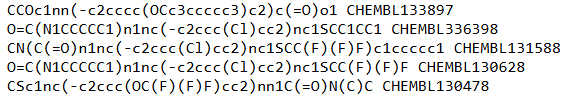

SO IN ORDER TO PROCEED WITH USING THIS APP, WE'ARE GOING TO UPLOAD THE FILE "Drag and drop file here", OR IN "Browse files"  AND SELECT THE INPUT FILE TO BE UPLOADED. WE CAN SEE THT THE BLUE BOX WILL BE GIVING US A WAITING MESSAGE SO IT'S SAYING UPLOAD INPUT DATA IN THE SIDEBAR TO START. SO ESSENTIALLY THE INPUT FILE CONTAINS THE SMILES NOTATION AND THE CHEMBL ID. AND SO THE CHEMBL ID, WE CAN THINK OF IT AS KIND OF LIKE THE NAME OF THE MOLECULE HERE "CHEMBL133897". AND PARTICULARLY THE CHEMBL ID IS A UNIQUE IDENTIFICATION NUMBER OF THIS PARTICULAR MOLECULE THAT CHEMBL DATABASE HAS ASSIGNED TO IT AND THE SMILES NOTATION HERE IS A ONE-DIMENSIONAL REPRESENTATION OF THIS PARTICULAR CHEMICAL STRUCURE, AND SO THIS SMILES NOTATION "CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1", WILL BE USED BY THE PADEL DESCRIPTOR SOFTWARE, THAT WE'RE GOING TO USING HERE TODAY IN THE APP, IN ORDER TO GENERATE ,MOLECULAR FINGERPRINT  WHICH DESCRIBE THE UNIQUE CHEMICAL FEATURES OF THE MOLECULE AND THEN SUCH MOLECULAR FINGERPRINTS WILL THEN BE USED BY THE MACHINE LEARNING MODEL TO MAKE A PREDICTION. [1:21:58].
AND SO THE PREDICTON WILL BE THE "pIC50" VALUES THAT WE SEE IN THE 1ST PAGE OF APP IN A DRAW EXAMPLE "pIC=6.5", AND THE "pIC50" VALUE IS THE BIOACTIVITY AGAINST  THE TARGET PROTEIN OF INTEREST AND SO IN THIS APPLICATION THE TARGET PROTEIN IS ACETHYLCHOLINESTERASE, AND THIS TARGET PROTEIN IS A TARGET FOR THE ALZHEIMER'S DISEASE.
AND SO THIS APP IS BUILT IN PYTHON USING THE "STREAMLIT LIBARARY" AND THE MOLECULAR FINGERPRINTS ARE CALCULATED USING PADEL DESCRIPTOR.]]





AND SO BACK IN 2016 THEY HAVE PUBLISHED A PAPER "PROBING THE ORIGINS OF HUMAN ACETYCHOLINESTERASE INHIBITION VIA QSAR MODELING AND MOLECULAR DOCKING" (VER PAPER EM "D:\Vídeos\Python for Bioinf Drug Discovery Using ML & Data Analysis\Probing the origins of human.pdf"), DESCRIBING THE DEVELOPMENT OF A QSAR MODEL FOR PREDICTING THE BIOACTIVITY OF THE ACETYCHOLINESTERASE SERIES AND SO IF WE ARE INTERESTED IN THIS ARTICLE PLEASE FELL FREE TO READ IT.

NOW LET'S DRAG AND DROP THE INPUT FILE "example_acetylcholinesterase.txt" THAT WE HAVE IN THE PATH: "C:\Users\ferna\BIOACTIVITY_PRED_APP\bioactivity-prediction-app-main\bioactivity-prediction-app-main\example_acetylcholinesterase.txt", AND IN ORDER TO INITIATE THE PREDICTION WE'RE GOING TO PRESS ON THE "Predict" BUTTON AND THEN WE CAN SEE THE INPUT FILE "Original input file", IS GIVING US THE DATAFRAME [1:23:28].
AND THEN IT'S CALCULATING THE DESCRIPTOR, AND THE CALCULATED DESCRIPTOR IS PROVIDED IN "Calculated molecular descriptors" DATAFRAME WHERE WE ARE GOING  TO SEE THAT ARE A TOTAL OF 5 INPUT MOLECULES AND THERE ARE 882 COLUMNS AND WE'RE GOING TO SEE THERE THAT THE 1ST COLUMN IS THE CHEMBL ID. SO IN REALITY WE'RE GOING TO HAVE A TOTAL OF 881 (BECAUSE THE 1ST COLUMN AS REFERED ABOVE IS CHEMBL ID) MOLECULAR FINGERPRINTS AND THE MOLECULAR FINGERPRINTS THAT WE'RE USING TODAY IS THE PUBCHEM FINGERPRINT AND BECAUSE WE HAVE PREVIOUSLY BUILT A MACHINE LEARNING MODEL WHICH WE WILL BE SHOWING , USING THE FILE "bioactivity_prediction_app.ipynb" A JUPYTER NOTEBOOK FILE, WE HAD REDUCED THE NUMBER OF DESCRIPTORS FROM 881 TO 217 "Subset of descriptors from previuously built models", NO ACTUALLY 218 BECAUSE WE HAVE ALREADY DELETED THE 1ST COLUMN, THE "Name" OF CHEMBL ID, OR THE CHEMBL ID COLUMN. AND SO WE HAVE REDUCED FROM 881 COLUMNS TO 218 COLUMNS SO IN THE CODE WE'RE GOING TO BE SELECTING THE SAME 218 COLUMNS THAT WE SEE IN "Subset of descriptors from previuously built models" DATAFRAME, WHICH CORRESPONDS TO THE DESCRIPTOR SUBSETS FROM THE INITIALLY FULL SET OF 881. SO WE'RE GOING TO USE THE 218 AS THE "X" VARIABLES (OR THE INDEPENDENT VARIABLE) IN ORDER TO PREDICT THE "pIC50" AND FINALLY WE HAVE THE PREDICTION OUTUP "Prediction outup", AND THE LAST DATAFRAME, AND WE'VE THE CORRESPONDING CHEMBL ID AND WE CAN ALSO DOWNLOAD THE PREDICTION BY PRESSING THE CORRESPONDING LINK "Download Predictions",  AS WE CAN SEE IN THE NEXT  IMAGE:                     [1:24:51]

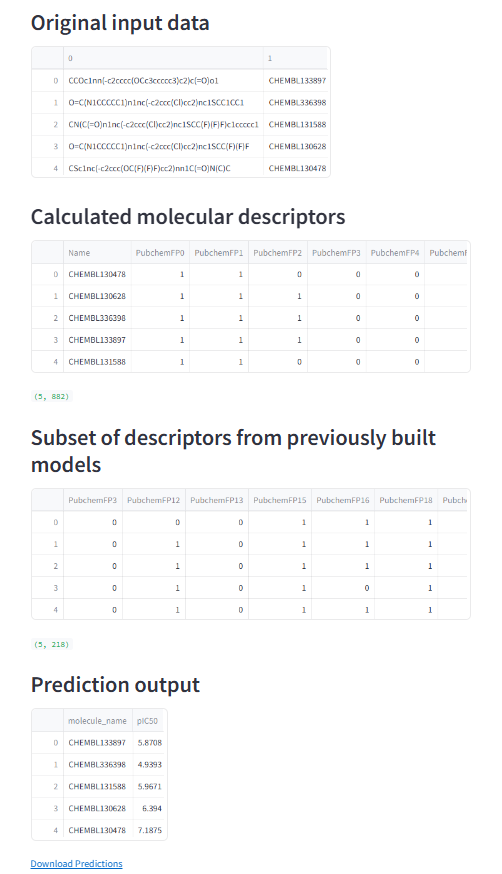

________________________________________________________________________________

SO LET'S STARTED:
SO WE HAVE TO 1ST BUILD OUR PREDICTION MODEL  USING THE JUPYTER NOTEBOOK AND THEN WE'RE GOING TO SAVE THE MODEL AS A "PICKLE" FILE (WITH THE EXTENSION .pkl LIKE IN THIS CASE "acetylcholinesterase_model.pkl"), LET US SHOW, OPENNING IN THE PROMPT OF THE CORRESPONDENT FOLDER (C:\Users\ferna\bioactivity_demo) AND WITH THE RESPECTIVE ENVIRONMENT ACTIVATED (bioactivity_new, WE'VE STARED THE PROMPT IN ANACONDA ENVIRONMENTS)  AND OPEN THE JUPYTER NOTEBOOK (or in our case the VS CODE) FROM THERE (PROMPT). AND THEN WE'RE GONNA OPEN UP THE JUPYTER NOTEBOOK "bioactivity_prediction_app.ipynb" (THAT WE'VE ADAPTADED FOR OUR WORK). ESSENTIALLY WE'RE GOING TO JUST DOWNLOAD THE CALCULATED FINGERPRINTS FROM THE GITHUB FO THE DATAPROFESSOR USING THE URL LINK AND SO WE'RE IMPORTING PANDAS AS PD, BUT IN OUR CASE 1ST DUE TO VERSIONS DIFERENCES OF STREAMLIT AND ALL THE LIBRARIES IMPLIED IN THERE, WE HAD TO IMPORT 1ST "pip install streamlit==0.71.0". AND THEN WE PROCEEDED (WE COULD COMPARE AS AN EXERCISE, OUR "bioactivity_prediction_app.ipynb" VERSION AGAINST THE DATAPROFESSOR VERSION WHICH HAS LITTLE DIFFERENCES, SO LET'S PROCEED). SO AFTER IMPORTING PANDAS AND THE RESULTING DATAFRAME, WHERE THE LAST COLUMN IS THE "pIC50" AND WE HAVE 881 COLUMNS FOR THE PUCHEM FINGERPRINTS. AND IN THE NEXT CELL IS WE'RE GOING TO BE DROPPING THE LAST COLUMN OR THE "pIC50" IN ORDER TO ASSIGN IT TO "X" VARIABLE (AS INDEPENDENT VARIABLE). AND THEN WE'RE GOING TO JUST SELECT THE LAST COLUMN DENOTED AS "-1", USING "Y = dataset.iloc[:,-1]", AND ASSIGNING IT TO THE "Y" VARIABLE (OR THE DEPENDENT VARIABLE). AND NOW THAT WE HAVE THE "X" AND "Y" VARIABLES SEPARETED WE'RE GOING TO NEXT REMOVE THE LOW VARIANCE FEATURE FROM THE "X" VARIABLE. SO INITIALLY WE HAVE 881 COLUMNS  AND SO APPLYING A THRESHOLD (LIMIAR) OF "0.1" THIS RESULTED IN 218 COLUMNS AND THEN WE'RE GOING TO BE SAVING IT INTO A DESCRIPTOR LIST CSV FILE ("descriptor_list.csv"). SO WE CAN SEE IT OPPENING THE FILE, WHERE WE CAN SEE THAT THE 1ST ROW CONTAINS THE NAMES OF THE FINGERPRINTS THAT ARE RETAINED, IN OTHER WORDS THE NAME OF THE DESCRIPTORS OF THE 218 COLUMNS (IF WE LOOK TO THE DATAFRAME OBTAINED IN "Remove low variance features"),  WE CAN SEE THAT THE "PubchemFP" (FINGERPRINT) 0, 1 AND 2 HAS BEEN REMOVED, AND WE HAVE FINGERPRINT 3 "PubchemFP3", AND THE FINGERPRINTS 4 UNTIL 11 HAS BEEN REMOVED, FINGERPRINT 14 HAS BEEN REMOVED, FINGERPRINT 17 HAS BEEN REMOVED. SO MORE THEN 600 FINGERPRINTS HAVE BEEN DELETED FROM THE "X" VARIABLE AND SO THE REMOVAL OF EXCESSIVE REDUNDANT FEATURES WILL ALLOW US TO BUILD THE MODEL MUCH QUICKER. SO NEXT WE'LL TELL HOW WE'RE GOING TO BE MAKING USE OF THIS DESCRIPTOR LIST ("descriptor_list.csv") IN ORDER TO SELECT THE SUBSETS FROM THE COMPUTED DESCRIPTORS THAT WE OBTAIN FROM THE INPUT QUERY (IN APP ON DATAFRAME "Calculated molecular descriptors"), SO OUTPUT OF THIS SMILES NOTATION WE GENERATED 881 COLUMNS (NOT 882, BECAUSE THE 1ST COLUMN ARE MOLECULES NAMES). AND THEN IN "Subset of ddescriptors from previously built models" WE'RE GOING TO BE SELECTING A SUBSET OF 218 FROM THE INITIALLY 881 BY USING THIS PARTICULAR LIST "descriptor_list.csv" OF DESCRIPTORS. NOW LET'S GO BACK TO THE JUPYTER NOTEBOOK (OR VS CODE) "bioactivity_prediction_app.ipynb" AND LET'S SAVE IT (TO GET THE "descriptor_list.csv" IN OUR WORKING FOULDER) AND THEN WE'RE GOING TO BUILD THE MODEL (THIS IS DONE IN "bioactivity_prediction_app.ipynb", TO GENERATE THE FILES USED IN THE APP), RANDOM FOREST MODEL, WE'RE SETTING HERE (
  model = RandomForestRegressor(n_estimators=500, random_state=42)
  model.fit(X, Y)
  r2 = model.score(X, Y)
  r2)
  THE RANDOM STATE TO BE 42, AND THE NUMBER OF ESTIMATORS TO BE 500.                 [1:29:34]       
AND WE'RE USING THE RANDOM FOREST REGRESSOR AND WE FIT THE MODEL HERE IN ORDER TO TRAIN IT (model.fit(X, Y)) AND THEN WE'RE GOING TO CALCULATING THE SCORE (r2 = model.score(X, Y)), WHICH IS THE "r2score", AND THEN WE'RE ASSIGNING IT TO THE R2 VARIABLE (r2 = model.score(X, Y)), AND THEN FINALLY WE'RE GOING TO BE APPLYING THE TRAINED MODEL TO MAKE A PREDICTION (IN "MODEL PREDICTION") ON THE "X" VARIABLE, WHICH IS HTE TRAINING SETS ALSO AND THEN WE'RE ASSIGNING IT TO THE "Y_pred" VARIABLE ( Y_pred = model.predict(X)). AS WE CAN OBSERVE IN "bioactivity_prediction_app.ipynb"THE VALUE OF "r2" IS 0.86.
SO INT HTE NEXT STEP LET'S PRINT OUT THE PERFORMANCE IN "Model Performance" WHERE MEAN SQUARE ERROR OF 0.34.
AND NEXT LET´S MAKE THE SCATTER PLOT OF THE ACTUAL AND PREDICTED VALUES IN "Data Visualization (Experimental vs Predicted pIC50 for Training Data)" AND WE GET THE PLOT GRAPH (SEE VIDEO 1:30:20, OR IN NOTEBOOK).
AND FINALLY WE'RE GOING TO BE SAVING THE MODEL "Save Model as Pickle Object" BY DUMPING IT USING THE PICKLE FUNCTION "pickle.dump" AND THEN AS INPUT ARGUMENT WE'RE GOING TO HAVE MODEL AND THEN WE'RE GOING SAVE IT AS "acetylcholinesterase_model.pkl" AND THERE WE GO WE HAVE ALREDY SAVED THE MODEL.

SO WE'RE GOING AHEAD CLOSING THE NOTREBOOK "bioactivity_prediction_app.ipynb", AND LET'S GO OVER BACK AND LET'S TAKE A LOOK TO "app.py" FILE.
SO LET'S HAVE A BRIEF LOOK, WE'RE GOING TO SEE THAT THE "app.py" IS LESS THEN 90 LINES FO CODE AND ABOUT 87 TO BE EXACT AND WE'RE GOING TO SEE THAT THERE ARE SOME WHITE SPACES SO EVEN IF WE DWLWTW ALL OF THE WHITE SPACES IT MIGHT BE EVEN LESS, MAYBE 80 LINES OF CODE.
SO THE 1ST 7 LINES OF CODE WILL BE IMPORTING THE NECESSARY LUIBRARIES AND SO WE'RE MAKING USE OF STREAMLIT AS THE WEB FRAMEWORK AND WE'RE USING PANDAS TO DISPLAY THE DATAFRAME AND THE IMAGE FUNCTION FROM THE "PIL" LIBRARY IS USED TO DISPLAY THIS (IN THE RUNNING APP) ILLUSTRATION AND THE DESCRIPTOR CALCULATION WILL BE MADE POSSIBLE BY USING THE "subprocess" LIBARY. SO THAT WILL ALLOW US TO COMPUTE THE "PADEL" DESCRIPTOR VIA THE USE OF JAVA AND WE'RE UJSING THE "os" LIBRARY IN ORDER TO PERFORM FILE HANDLING. SO "HERE IN "app.py" FILE, WE'RE GOING TO SEE THAT WE'RE USING THE "os.remove" (line of code 15, 1:31:59), IN ORDER TO REMOVE THE "molecule.smi" FILE.SO WE'RE GOPING TO EXPLAIN THAT IN JUST A MOMENT.
"base64" IS USED FOR ENCODING DECODING OF THE FILE WHEN WE WILL MAKE THE FILE AVAILABLE FOR DOWNLOAD THE PREDICTION "Download Predictions".
AND THE "pickle" LIBRARY WILL BE USED FOR LOADING UP THE PICKLED FILE OF THE MODEL.


_SO WE'RE GOING TO BE SEEING THAT WE'RE MAKING 3 CUSTOM FUNCTIONS, SO LINES 10 THROUGH 15, THE 1ST CUSTOM FUNCTION WILL BE OUR "# Molecular descriptor calculator". SO WE'RE DEFINING A FUNCTION CALLED "#desc_calc"  ("def desc_calc():"), AND THEN THE STATEMENT UNDERNEATH IT (POR BAIXO DESTA) WILL BE THE "bashCommand" (line of code 12) AND SO THIS BASHCOMMAND IS WHAT WE'RE NORMALLY USING WHEN WE TYPE INTO THE COMMAND LINE. SO THIS OPTION HERE ("-Djava.awt.headless=true" ,IN BASHCOMMAND) WILL ALLOW US TO RUN THE CODE IN THE COMMAND LINE WITHOUT LAUNCHING THE "GE VERSION ???" OF PADDLE DESCRIPTOR [1:32:56], AND SO WITHOUT THIS OPTION IT WILL LAUNCH A "GE VERSION ???" BUT SINCE WE DON'T WANT THAT TO HAPPEN WE'RE GOING TO USE THIS OPTION. AND SO WE'RE USING THE JAR FILE "-jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar" TO MAKE THE CALCULATION OF THE FINGERPRINTS AND THEN YOU'RE GONNA SEE HERE THAT WE HAVE ADDITIONAL OPTIONS SUCH AS REMOVING SALT STANDARDDIZING THE NITRO GROUP OF THE MOLECULE "-removesalt -standardizenitro -fingerprints -descriptortypes" AND THEN WE'RE USING THE FINGERPRINT TO BE THE PUBCHEM FINGERPRINT USING THE XML FILE (PubchemFingerprinter.xml). AND FINALLY WE'RE GENERATING THE MOLECULAR DESCRIPTOR FILE BY SAVING IT TO THE "-file descriptors_output.csv". SO THIS "bashCommand", WILL BE SERVING AS INPUT IN THERE "bashCommand = ... (bashCommand.split()... ", IN THE "...subprocess.Popen(bashCommand.split(),..." FUNCTION. AND THEN FINALLY AFTER THE DESCRIPTOR  HAS BEEN CALCULATED WE'RE REMOVING THE MOLECULE SMILES "os.remove('molecule.smi')" AND SO THE MOLEUCLE SMI FILE WILL BE GENERATED IN ANOTHER FUNCTION SO WE'LL BE DISCUSSING TAHT IN JUST A MOMENT.     [1:33:57]

_AND THE 2ND COSTUM FUNCTION THAT WE'RE GENERATING HERE IS "# File download", SO AFTER MAKING THE PREDICTION WE'RE GOING TO BE ENCODING DECODING THE RESULTS AND THEN THE OUTUP WILL BE AVAILABLE AS A FILE FOR DOWNLOADING USING THIS LINK (IN THE APP THE LINK IS:) "Download Predictions" AT THE BOTTOM OF THE APP PAGE.

_AND THE 3RD FUNCTION THAT WE'RE CREATING IS CALLED "Model building" SO IT WILL BE ACCEPTING THE INPUT ARGUMENT WHICH IS THE INPUT DATA "def build_model(input_data):", AND THEN IT WILL BE LOADING UP THE PICKLE FILE "load_model = pickle.load(open('acetylcholinesterase_model.pkl', 'rb'))", WHICH IS THE BUILT MODEL INTO A LOAD MODEL VARIABLE, AND THEN THE MODEL WHICH WE HAVE LOADED WILL BE USED FOR MAKING A PREDICTION "prediction = load_model.predict(input_data)" ON THE INPUT DATA WHICH IS SPECIFIED HERE.AND AFTER THE PREDICTION HAS BEEN MADE WE'RE GOING TO BE ASSIGNING IT TO THE PREDITCION VARIABLE THEN WE'RE GOING TO BE PRINTING OUT THE HEADER CALLED PREDICTION OUTPUT WHICH IS IN THE APP ON "Predicton outupt".AND UNDERNEATH IT (POR BAIXO) WE'RE GOING TO CREATE A VARIABLE CALLED PREDICTION OUTPUT "prediction_output = pd.Series(prediction, name='pIC50')" AND WE'RE GOING TO BE CREATING A PD DOT SERIES "prediction_output = pd.Series(prediction, name='pIC50')". SO ESSSENTIALLY IT IS A COLUMN USING PANDAS AND SO THE 1ST COLUMN IS PREDICTION AND THEN WE'RE NAMING IT "pIC50". AND THEN WE'RE GOING TO CREATE ANOTHER VARIABLE CALLED MOLECULE NAME "molecule_name = pd.Series(load_data[1], name='molecule_name')" AND THE COLUMN THAT WE'RE CREATING IS THE CHEMBL ID, OR THE MOLECULE , WHICH APPEARS IN THE 1ST COLUMN ON THE APP "Prediction output".
AND THEN WE'RE GOING TO COMBINING THE 2 COLUMNS GIVEN BY THE INDIVIDUAL VARIABLES CALLED PREDICTION OUTPUT "Prediction output" AND MOLECULE NAME SO WE'RE USING THE CONCAT FUNCTION "df = pd.concat([molecule_name, prediction_output], axis=1)" AND THEN IN BRACKET WE'RE USING MOLECULE NAME WHICH IS THE 1ST COLUMN PREDICTION OUTPUT (IN THE APP), WHICH IS THE 2ND COLUMN AND THEN WE'RE USING AN AXIS=1, IN ORDER TO TELL IT TO COMBINE THE 2 VARIABLES OR THE 2 COLUMNS IN A SIDE-BY-SIDE MANNER. SO AXIS=1     [1:35:53]
WILL ALLOW US TO HAVE 2 COLUMNS SIDE-BY-SIDE, OTHERWISE IT WILL BE STACKED UNDERNEATH IT, SO "pIC50" COLUMNS WILL BE STACKED UNDERNEATH IT THE "molecule_name", IF THE AXIS WAS TO BE ZERO (AXIS=0).
AND FINALLY WE'RE WRITING OUT THE DATAFRAME "st.write(df)" DATAFRAME. AND THEN WE'RE ALLOWING IT TO GENERATE  THE DOWNLOAD LINK "st.markdown(filedownload(df), unsafe_allow_html=True)", LIKE WE CAN SEE IN THE APP IN "Download Predictions", AND WE'RE MAKING USE OF THE DOWNLOAD FUNCTION DESCRIBED EARLIER. AND THEN IN LINE NUMBER 38 "image = Image.open('logo.png')", WE'RE GENERATING THIS OR DISPLAYING OUR APP OBSERVING IMAGE OF THE WEB APP. [1:36:31]  





    **